<a href="https://colab.research.google.com/github/Jiawei-Xing/Machine-Learning/blob/main/DL_genomics_workshop_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Deep Learning for 🧬 Biological Sequences

**Date:** August 17, 2023

**Presenters:** Dr. Bahrad A. Sokhansanj ; Mohammad Saleh Refahi

**Location:** Drexel University

---

## Workshop Overview

In this section, we will delve into the world of pre-training and fine-tuning large language models, specifically tailored for DNA sequences. Get ready for an interactive session where we'll dive deep into genomics datasets, exploring how these models can revolutionize the field.

By the end of this section, you'll gain insights into:

- How to perform pre-training using Hugging Face methodologies
- Using pre-trained language models for 🌱 generating embeddings
- Fine-tuning pre-trained embeddings for specific applications, in our case, taxonomic classification
- Fine-tuning architecture based on contrastive learning and a form of triplet architecture
- Visualizing and comparing 🧮 embeddings

Let's embark on this genomics journey together!


---



---




## <font color="#FFF000">1- Pre-training Language Models for Genomic Sequences using Hugging Face</font>


### 🤗 Hugging Face
*  Hugging Face is a platform that provides pre-trained natural language processing models and tools, enabling users to easily leverage state-of-the-art
models for various tasks through a user-friendly API.

*   Hugging Face provides a range of tools like 🤗 Hugging Face Hub, 📊 Datasets, and 🤖 Transformers library for easy access, sharing, and development of NLP models.

### Our MetaBERTa Model - Pre-training A Roberta Model on Bacterial Genomics seqeucnes.


- Pre-training requires significant computational resources, potentially including GPUs with ample memory.
- We utilized a dataset of 33,902 prokaryotic genomes from NCBI for our model.
- Genomes have an average length of 3.4 Mb, ranging from 0.11 Mb to 13 Mb.
- We extracted one dataset: 51M fragments (200bp).
- We used RoBERTa, a version of the BERT Model, and experimented with different parameters to optimize the model. We trained nearly 60 different large models over multiple days on powerful resources.
- Our models are under continuous development as we work to improve its performance for genomics sequences.
- In this workshop, we're sharing a model with 181M parameters.

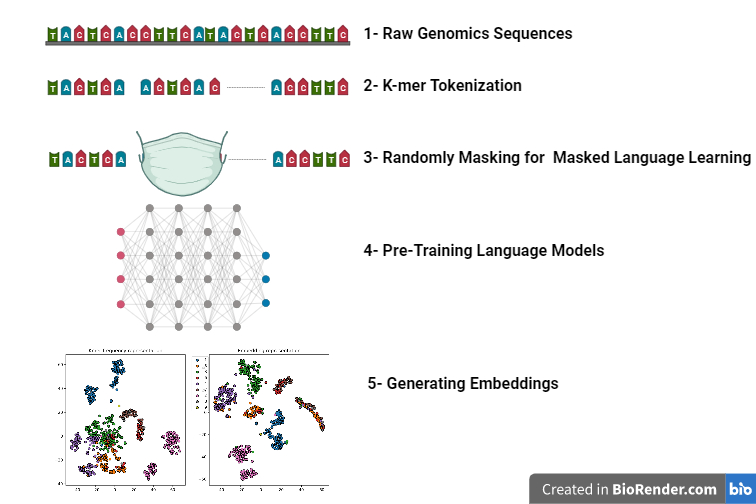

For more details, you can check out the repository on [**GitHub :MetaBERTa**](https://github.com/EESI/MetaBERTa/tree/master).


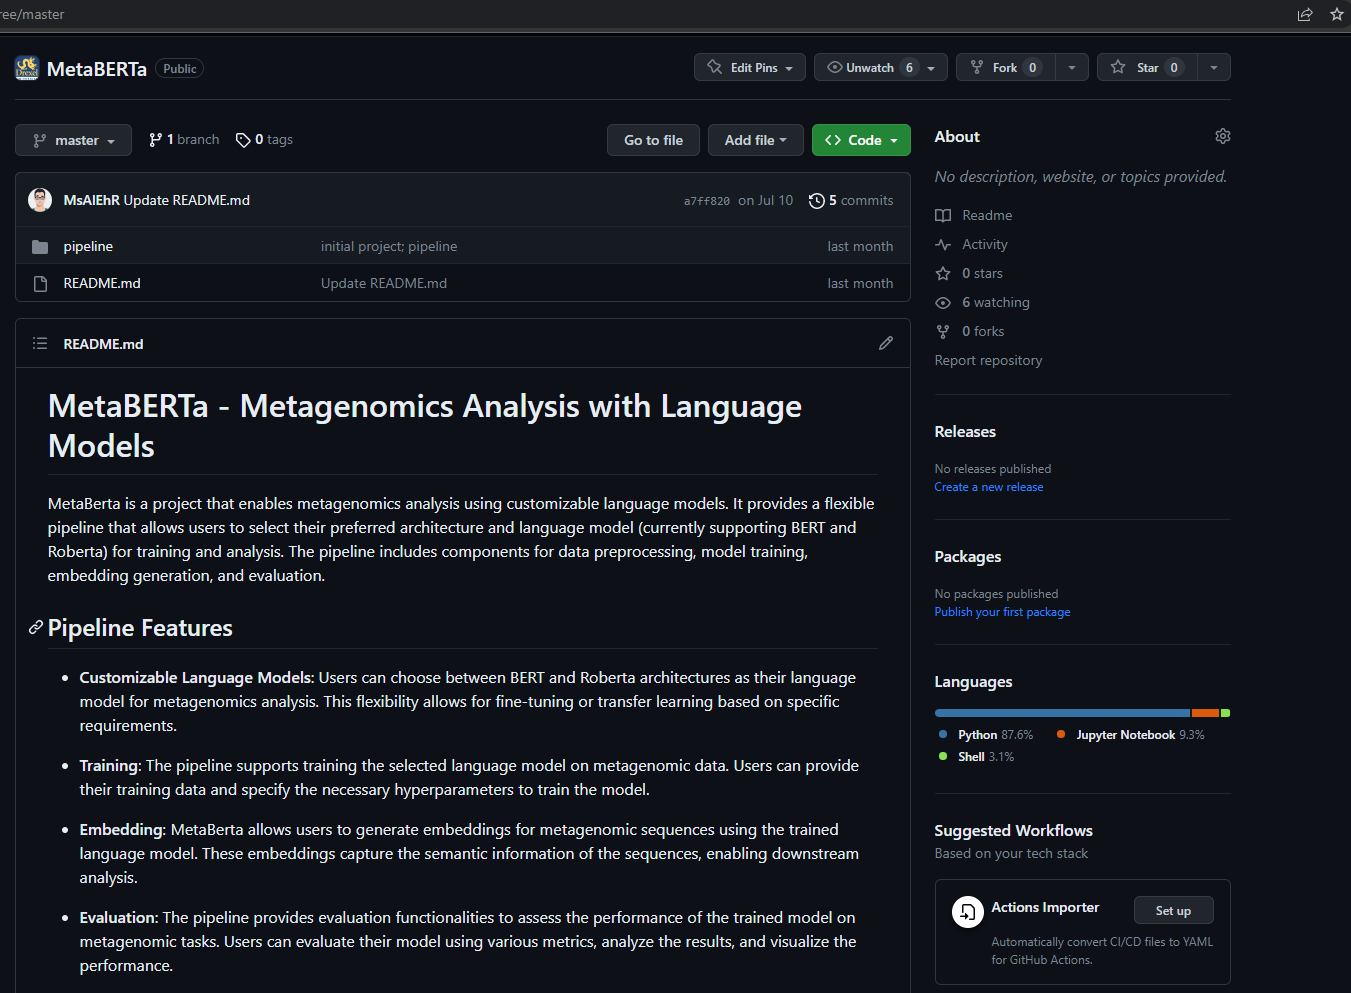

## <font color="#FF0000"> * Requirements

Download files from follwoing Drive :
https://drive.google.com/drive/folders/1REA1IV7jCOJNgjIoyphZpd65-xm1SYT6?usp=drive_link

In [1]:
# Download Model parameters
!gdown 13DbsAKhTLbVvSbZBUXUktP_cHj1eN1YY
# Kmer Tokenizer
!gdown 1-EeF4mDDTCq1x6dKzKxfUbKIqC5wrPV1
# download vocabulary
!gdown 1w_3gZiSqCam18S7JNoYxZh5gbaJ0Y8QB
# download dataset
!gdown  1eEyWObACjXSl70pQZc7hJGf2p9AN2QK1
# Extract the model data
!tar -xvf model.tar
# Download pre-trained embedding of Dairydb
!gdown 18WosMlD_5z3WNXkI25vaGv1m8X5RWLz1
# Download random embedding of Dairydb
!gdown 1Fx8idp7mo0PF9NrvXqD-9opKgh8QCGb4

Downloading...
From: https://drive.google.com/uc?id=13DbsAKhTLbVvSbZBUXUktP_cHj1eN1YY
To: /content/model.tar
100% 728M/728M [00:07<00:00, 100MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1-EeF4mDDTCq1x6dKzKxfUbKIqC5wrPV1
To: /content/KmerTokenizer.py
100% 8.58k/8.58k [00:00<00:00, 28.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1w_3gZiSqCam18S7JNoYxZh5gbaJ0Y8QB
To: /content/6mer_vocab.txt
100% 28.7k/28.7k [00:00<00:00, 54.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1eEyWObACjXSl70pQZc7hJGf2p9AN2QK1
To: /content/200_fragmented_dairydb.csv
100% 144M/144M [00:02<00:00, 51.7MB/s]
model_repo/2023-June-25_12-42-13_PM/config_file.yml
model_repo/2023-June-25_12-42-13_PM/config.json
model_repo/2023-June-25_12-42-13_PM/pytorch_model.bin
model_repo/2023-June-25_12-42-13_PM/special_tokens_map.json
model_repo/2023-June-25_12-42-13_PM/tokenizer_config.json
model_repo/2023-June-25_12-42-13_PM/training_args.bin
model_repo/2023-June-25_12-42-13_PM/vocab.txt
Dow

In [2]:
# install required libraries :  transformers, datasets

!pip install transformers datasets  --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.8 MB/s eta 0:00:00


## <font color="#FFF000"> 2- Generating Embeddings
Let's dive into the code!

Now, we'll start by loading a pre-trained model and reading a dataset to generate embeddings for that dataset.


In [3]:
##
from transformers import AutoModel
from datasets import Dataset
from  KmerTokenizer import KmerTokenizer
##
import torch
from torch.utils.data import DataLoader
##
from numpy import zeros, newaxis
import numpy as np
import yaml
import os
import sys
import glob
import time
import argparse



In [4]:


# Define the embedder function
def embedder(dataset_source):

    # Check for GPU availability
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    seq_list = []

    # Load the dataset from a CSV file
    dataset = Dataset.from_csv(dataset_source)

    # Define a KmerTokenizer
    tokenizer = KmerTokenizer("6mer_vocab.txt",
                              kmer_size=6,
                              overlapping=True,
                              model_max_length=200)

    # Tokenization function
    def tokenize(element):
        outputs = tokenizer(
            element["fragment"],
            truncation=True,
            padding=True,
            max_length=200,
            return_overflowing_tokens=True,
            add_special_tokens=False,
            return_special_tokens_mask=True,
            return_length=True,
        )
        input_batch = []
        for length, input_ids in zip(outputs["length"], outputs["input_ids"]):
            input_batch.append(input_ids)
        return {"input_ids": input_batch}

    # Apply tokenization to the dataset
    tokenized_datasets = dataset.map(tokenize, batched=True)

    # Remove the "fragment" column
    tokenized_datasets = tokenized_datasets.remove_columns("fragment")

    #############!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!####
    # Uncomment the following line to select a subset of data
    # tokenized_datasets = tokenized_datasets.select(range(100))

    # Load a pre-trained model
    model = AutoModel.from_pretrained("/content/model_repo/2023-June-25_12-42-13_PM", output_hidden_states=True)

    # Move the model to the selected device
    model.to(device)

    print("Ready input dataset shape", len(tokenized_datasets))

    # Create a data loader for tokenized data
    data_loader = DataLoader(torch.IntTensor([tokenized_datasets[i]['input_ids']  for i in range(len(tokenized_datasets))]),
                             batch_size=8,
                             shuffle=False,
                             num_workers=15)

    FEATS = []

    start_time = time.time()

    # Loop through batches and perform embedding
    for idx, inputs in enumerate(data_loader):
        # Move inputs to the device
        with torch.no_grad():  # Disable gradient tracking
            inputs = inputs.to(device)

            # Get hidden states from the model
            output_layer_minus_2 = model(inputs).hidden_states[-2]

            if idx % 500 == 0:
                print(idx, "number have been processed")

            FEATS.append(np.mean(output_layer_minus_2.cpu().detach().numpy(), axis=1)[np.newaxis, ...])

    print(f"embedding time: {time.time() - start_time:.6f} seconds")

    # Concatenate the embeddings
    tensor = np.concatenate(FEATS, axis=1)[0]

    print("output embeddings shape", tensor.shape)

    # Save the embeddings to a file
    np.save(os.path.join("embedding.npy"), tensor)
    print("Finished!!!")


# Function to get the size of trainable parameters in a model
def get_parameters_size(model):
    parameters_size = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return parameters_size


In [5]:
if __name__ == '__main__':

    file_path="/content/200_fragmented_dairydb.csv"


    if os.path.exists("embedding.npy"):
        print(f" Embedding already exist. Skipping processing for this file.")
    else:
        embedder(file_path)


 Embedding already exist. Skipping processing for this file.


## <font color="#FFF00"> 3- Fine-Tuning Embeddings with Triplet Network

### Triplet Architecture: A Kind of Siamese Network with Contrastive Learning


In developing our approach, we drew inspiration from the paper "Contrastive learning on protein embeddings enlightens midnight zone at
lightning speed "  [Heinzinger et all , 2021](https://web.archive.org/web/20220527192425id_/https://www.biorxiv.org/content/biorxiv/early/2021/11/15/2021.11.14.468528.full.pdf). This paper played a pivotal role in shaping our concept.


### Our Sweet Triplet !!

While reviewing the referenced paper's codebase, we encountered challenges in its compatibility with our chosen dataset, which differed from the CATH dataset used in the paper. The original implementation was closely aligned with the specific dataset structure, making it less adaptable to other datasets.

To address this limitation, we focused on improving the codebase's flexibility to accommodate various datasets. Our enhancements encompass the following areas:

- **Dataset Flexibility:** We restructured the code to allow seamless integration with diverse datasets beyond the CATH dataset, enhancing its applicability across genomic analysis tasks.
- **Configurable Hierarchical Levels:** The original code was optimized for four hierarchical levels, mirroring the CATH dataset. We expanded this to allow configuration for any hierarchical level, offering greater versatility across different classification needs.
- **Modular Tuning Architectures:** Recognizing the importance of model adaptability, we engineered our code to be compatible with a wide range of fine-tuning architectures. This empowers researchers to experiment and adapt according to their specific research requirements.

These improvements not only make the code more adaptable to a variety of datasets and classification levels but also lay the groundwork for seamless integration with different fine-tuning approaches. Our aim is to empower researchers with tools that can be customized to their distinct needs, fostering advancements in genomic sequence analysis.


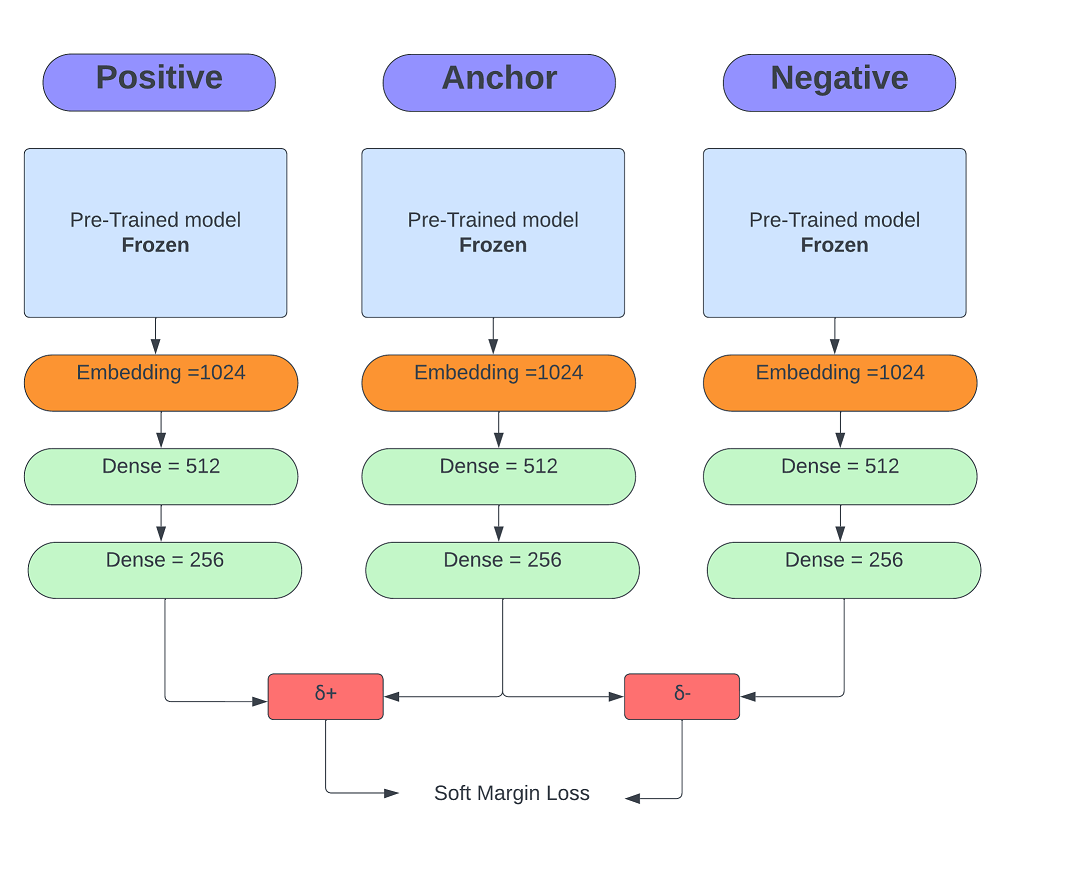

### Triplet Network Dataset Generation

As an Example : Taxonomic classification is the systematic arrangement of living organisms into hierarchical groups based on their shared characteristics and evolutionary relationships.

- Hierarchical approach with four class levels: phylum, order, family, and genus.
- Dataset preparation crucial: Positive and negative sample pairs relative to anchors.
- Negative samples randomly selected from different phylum level(all level).
- Positive sample generation with different similarity levels:
  - Level 0: Same phyla.
  - Level 1: Same order.
  - Level 2: Same family.
  - Level 3: Same genus.



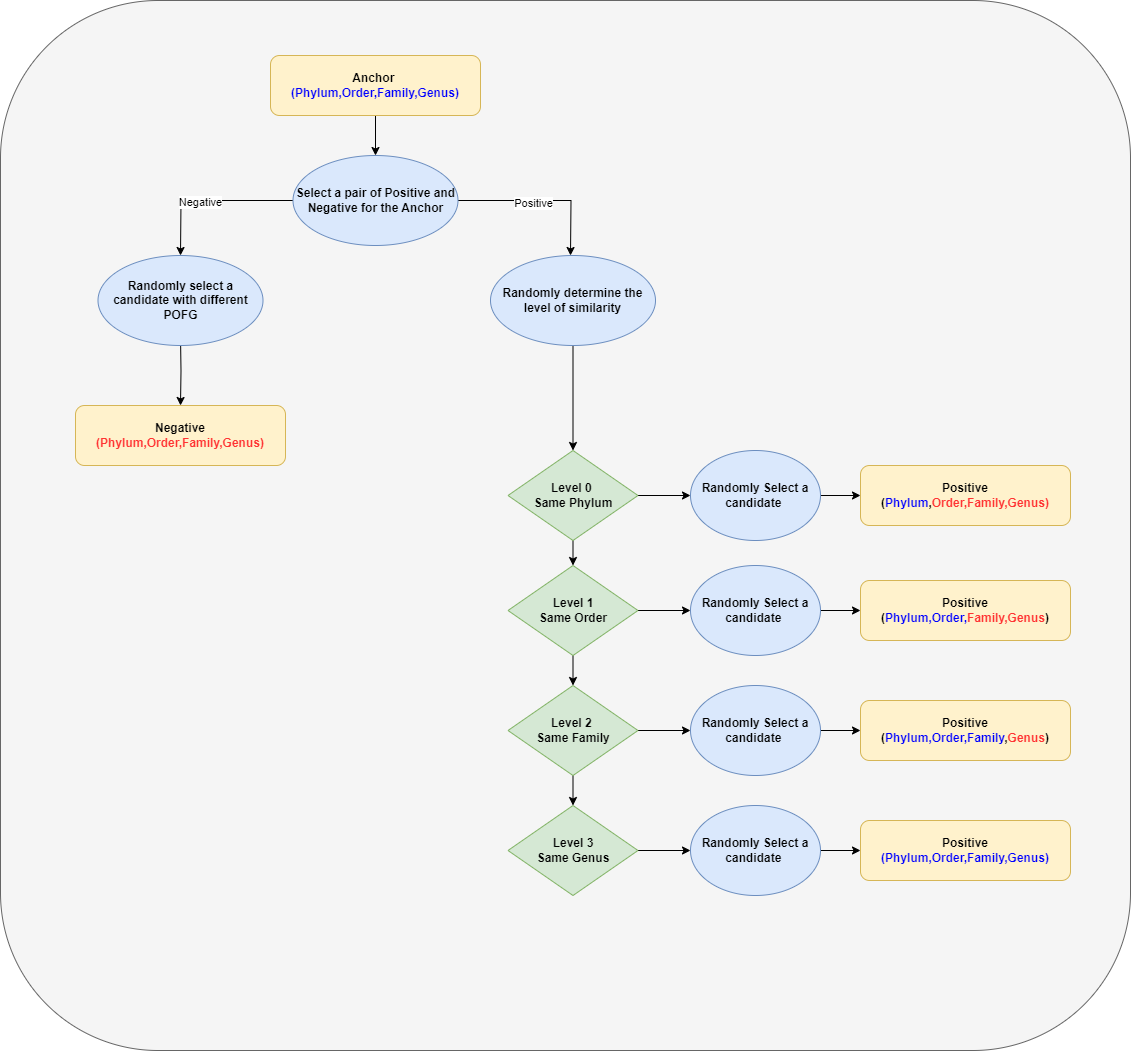

### Getting into the Code


#### **Reading and Preparing Dataset for Taxonomic Classification:**



In [6]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import h5py


In [7]:

embedding_path = "embedding.npy"

dataset_csv = "/content/200_fragmented_dairydb.csv"

# Read embeddings
with open(embedding_path, 'rb') as f:
            emb = np.load(f)

# Load the dataset into a pandas DataFrame
data = pd.read_csv(dataset_csv)
data= data.reset_index().rename(columns={"index":"idx"})

data

,idx,id,fragment,position,sequence,phylum,class,order,family,genus,species
0,0,Slackia_heliotrinireducens_AF101241_TS;d:Bacteria,GATGAACGCTGGCGGCGCGCCTAACACATGCAAGTCGAACGATTAA...,1,GATGAACGCTGGCGGCGCGCCTAACACATGCAAGTCGAACGATTAA...,Actinobacteria,Coriobacteriia,Coriobacteriales,Coriobacteriaceae,Slackia,Slackia_heliotrinireducens
1,1,Slackia_heliotrinireducens_AF101241_TS;d:Bacteria,GGGTCGCGGCCCATCAGGTAGACGGCGGGGCAACGGCCCGCCGTGC...,2,GATGAACGCTGGCGGCGCGCCTAACACATGCAAGTCGAACGATTAA...,Actinobacteria,Coriobacteriia,Coriobacteriales,Coriobacteriaceae,Slackia,Slackia_heliotrinireducens
2,2,Slackia_heliotrinireducens_AF101241_TS;d:Bacteria,AACCGCTTTCAGCAGGGAAGAACAATGACGGTACCTGCAGAAGAAG...,3,GATGAACGCTGGCGGCGCGCCTAACACATGCAAGTCGAACGATTAA...,Actinobacteria,Coriobacteriia,Coriobacteriales,Coriobacteriaceae,Slackia,Slackia_heliotrinireducens
3,3,Slackia_heliotrinireducens_AF101241_TS;d:Bacteria,GAGTGAGGTAGGGGAGGATGGAATTCCCGGTGTAGCGGTGGAATGC...,4,GATGAACGCTGGCGGCGCGCCTAACACATGCAAGTCGAACGATTAA...,Actinobacteria,Coriobacteriia,Coriobacteriales,Coriobacteriaceae,Slackia,Slackia_heliotrinireducens
4,4,Slackia_heliotrinireducens_AF101241_TS;d:Bacteria,CCGCAGCCAACGCATTAAGCGCCCCGCCTGGGGAGTACGGCCGCAA...,5,GATGAACGCTGGCGGCGCGCCTAACACATGCAAGTCGAACGATTAA...,Actinobacteria,Coriobacteriia,Coriobacteriales,Coriobacteriaceae,Slackia,Slackia_heliotrinireducens
...,...,...,...,...,...,...,...,...,...,...,...
80222,80222,Latilactobacillus_fragifolii_FR997884;d:Bacteria,CGAGCGCAGGCGGTTTTTTAAGTCTGATGTGAAAGCCTTCGGCTCA...,4,ATCGAGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCCT...,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Latilactobacillus,Latilactobacillus_fragifolii
80223,80223,Latilactobacillus_fragifolii_FR997884;d:Bacteria,TAGCAAACAGGATTAGATACCCTGGTAGTCCATGCCGTAAACGATG...,5,ATCGAGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCCT...,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Latilactobacillus,Latilactobacillus_fragifolii
80224,80224,Latilactobacillus_fragifolii_FR997884;d:Bacteria,AGAACCTTACCAGGTCTTGACATCCTTTGACCACTCTAGAGATAGA...,6,ATCGAGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCCT...,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Latilactobacillus,Latilactobacillus_fragifolii
80225,80225,Latilactobacillus_fragifolii_FR997884;d:Bacteria,AGGAAGGTGGGGACGACGTCAAATCATCATGCCCCTTATGACCTGG...,7,ATCGAGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCCT...,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Latilactobacillus,Latilactobacillus_fragifolii


In [8]:
#  the hierarchical levels you want to classify
hierarchical_levels= ["phylum","order","family","genus","id"]

class_domain_list= data[["idx"]+hierarchical_levels]

class_domain_list

,idx,phylum,order,family,genus,id
0,0,Actinobacteria,Coriobacteriales,Coriobacteriaceae,Slackia,Slackia_heliotrinireducens_AF101241_TS;d:Bacteria
1,1,Actinobacteria,Coriobacteriales,Coriobacteriaceae,Slackia,Slackia_heliotrinireducens_AF101241_TS;d:Bacteria
2,2,Actinobacteria,Coriobacteriales,Coriobacteriaceae,Slackia,Slackia_heliotrinireducens_AF101241_TS;d:Bacteria
3,3,Actinobacteria,Coriobacteriales,Coriobacteriaceae,Slackia,Slackia_heliotrinireducens_AF101241_TS;d:Bacteria
4,4,Actinobacteria,Coriobacteriales,Coriobacteriaceae,Slackia,Slackia_heliotrinireducens_AF101241_TS;d:Bacteria
...,...,...,...,...,...,...
80222,80222,Firmicutes,Lactobacillales,Lactobacillaceae,Latilactobacillus,Latilactobacillus_fragifolii_FR997884;d:Bacteria
80223,80223,Firmicutes,Lactobacillales,Lactobacillaceae,Latilactobacillus,Latilactobacillus_fragifolii_FR997884;d:Bacteria
80224,80224,Firmicutes,Lactobacillales,Lactobacillaceae,Latilactobacillus,Latilactobacillus_fragifolii_FR997884;d:Bacteria
80225,80225,Firmicutes,Lactobacillales,Lactobacillaceae,Latilactobacillus,Latilactobacillus_fragifolii_FR997884;d:Bacteria


In [9]:
for i in hierarchical_levels:
    class_domain_list[i] = pd.Categorical(class_domain_list[i])
    class_domain_list[i] = class_domain_list[i].cat.codes

class_domain_list['idx'] = class_domain_list['idx'].astype(str)

class_domain_list = class_domain_list.sort_values(by="phylum").copy()
class_domain_list

<ipython-input-9-9871c37d9c45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_domain_list[i] = pd.Categorical(class_domain_list[i])
<ipython-input-9-9871c37d9c45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_domain_list[i] = class_domain_list[i].cat.codes
<ipython-input-9-9871c37d9c45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,idx,phylum,order,family,genus,id
13158,13158,0,1,1,2,6
13165,13165,0,1,1,2,6
13164,13164,0,1,1,2,6
13163,13163,0,1,1,2,6
13162,13162,0,1,1,2,6
...,...,...,...,...,...,...
23193,23193,46,245,464,1788,10572
23192,23192,46,245,464,1788,10572
23191,23191,46,245,464,1788,10572
23189,23189,46,245,464,1788,10572


In [10]:
# save class-domain-list
# you can add your own dataset ....
os.makedirs("data",exist_ok=True)
class_domain_list.to_csv("./data/class-domain-list.txt",sep="\t",header=False,index=False)

In [11]:
# We are using a train-test split, but you could also utilize cross-validation

X_train, X_test, y_train, y_test=train_test_split(class_domain_list["idx"].tolist(), class_domain_list["idx"].tolist(),test_size=0.1,random_state=42)


In [12]:


# Save Embeddings with IDs to HDF5 file
# We split the embeddings into train, test, and domain-specific sets

# Save train embeddings
with h5py.File("data/train_embedding.h5", "w") as f:
    for index, id_ in enumerate(X_train):
        seq_id = id_
        f.create_dataset(seq_id, data=emb[index])

# Save test embeddings
with h5py.File("data/test_embedding.h5", "w") as f:
    for index, id_ in enumerate(X_test):
        seq_id = id_
        f.create_dataset(seq_id, data=emb[index])

# Save domain-specific embeddings
with h5py.File("data/embedding.h5", "w") as f:
    for index, id_ in enumerate(class_domain_list["idx"].tolist()):
        seq_id = id_
        f.create_dataset(seq_id, data=emb[int(seq_id)])

# These are dummy files. Make sure to run these in the current version of the code.
# They will be deleted in future versions

# Create a dummy train.fasta file
with open("data/train.fasta", 'w') as file:
    for i, seq_id in enumerate(X_train):
        file.write('>' + seq_id + '\n')
        file.write("ATCG" + '\n')

# Create a dummy test.fasta file
with open("data/test.fasta", 'w') as file:
    for i, seq_id in enumerate(X_test):
        file.write('>' + seq_id + '\n')
        file.write("ATCG" + '\n')


#### Training the Triplet

In [13]:
import seaborn as sn
import numpy as np
import torch
import torch.utils.data
import torch.nn as nn
from torch.autograd import Variable
from pathlib import Path
import time
import random
import copy
import h5py
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn import manifold

In [14]:
!gdown 1Tp_diM23THRF-uqXKwatMKD6kqbZSXmc

from utils import CustomDataset,DataSplitter,MyCollator,plotter,Eval ,TripletLoss,Saver, init_monitor ,toCPU  ,count_parameters ,dataloader ,get_baseline,testing,seed_all


Downloading...
From: https://drive.google.com/uc?id=1Tp_diM23THRF-uqXKwatMKD6kqbZSXmc
To: /content/utils.py
100% 32.4k/32.4k [00:00<00:00, 88.6MB/s]


In [15]:
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# intilize our plots
plt.switch_backend('agg')
# clear previous figures if already existing
plt.clf()


In [16]:
# Definition of the Tuner class for fine-tuning
class Tuner(nn.Module):
    def __init__(self):
        super(Tuner, self).__init__()

        self.Tuner = nn.Sequential(
            # Define the layers and dimensions for hyperparameter tuning
            nn.Linear(1024, 512),  # Input: 1024, Output: 512
            nn.Tanh(),
            nn.Linear(512, 256),   # Input: 512, Output: 256
            nn.Tanh(),
            nn.Linear(256, 128),   # Input: 256, Output: 128

        )

    def single_pass(self, X):
        X = X.float()
        return self.Tuner(X)

    def forward(self, X):
        # Perform forward pass for the triplet architecture
        anchor = self.single_pass(X[:, 0, :])  # Anchor embedding
        pos = self.single_pass(X[:, 1, :])     # Positive example embedding
        neg = self.single_pass(X[:, 2, :])     # Negative example embedding
        return (anchor, pos, neg)


In [17]:
def fine_tuning_triplet():


    ####################################################################
    #PARAM
    ####################################################################
    # torch.cuda.set_device(0)
    # measure training time
    start_overall = time.time()
    # set random seeds
    SEED = 63
    seed_all(SEED)

    # set up directory structure
    root = Path.cwd()
    data_dir = root / 'data' # create a directory for logging your experiments
    log_dir = root / 'log' / 'result'

    embedding_p = root / 'data'/ "embedding.h5"
    print("Loading dataset from: {}".format(embedding_p))

    # give your experiment a meaningful name here
    experiment_name = "dairydb_workshop_2023"

    experiment_dir = log_dir / experiment_name
    if not experiment_dir.is_dir():
        print("Creating new log-directory: {}".format(experiment_dir))
        experiment_dir.mkdir(parents=True)

    # Hyperparameters
    learning_rate = 1e-3
    batch_size = 32 # the number of actual samples per batch might be higher due to batch-hard sampling (see paper for more details)
    num_epochs = 4  # will stop earlier if early stopping is triggered
    n_classes = 4 # number of class-lvls; makes it easier to adjust for other problems
    n_bad = 1 # counter for number of epochs that did not improve (counter for early stopping)
    n_thresh = num_epochs  # threshold for number of epochs that did not improve (threshold for early stopping)
    batch_hard = True  # whether to activate batch_hard sampling (recommneded)
    exclude_easy = False # whether to exclude trivial samples (did not improve performa)
    margin =0.6 # set this to a float to activate threshold-dependent loss functions (see TripletLoss)

    ####################################################################
    #PARAM
    ####################################################################


    # initialize plotting class (used to monitor loss etc during training)
    pltr = plotter(experiment_dir)

    # Prepare datasets
    datasplitter = DataSplitter(embedding_p)

    train_splits, val, val_lookup20 = datasplitter.get_predef_splits()

    val20 = Eval(val_lookup20, val,  datasplitter, n_classes)

    train = CustomDataset(train_splits, datasplitter, n_classes)


    for i in range(2):
            train.get_example()

    train = dataloader(train, batch_size)

        # Get the size of the dataset
    dataset_size = len(train.dataset)

    print("Dataset size:", dataset_size)


    model = Tuner().to(device)
    criterion = TripletLoss(exclude_easy=exclude_easy,
                            batch_hard=batch_hard, margin=margin)

    optimizer = torch.optim.Adam(
        model.parameters(), lr=learning_rate, amsgrad=True)

    saver = Saver(experiment_dir)
    saver.save_checkpoint(model, 0, optimizer)
    baseline_acc, baseline_err = get_baseline(val20)

    print('###### Training parameters ######')
    print('Experiment name: {}'.format(experiment_name))
    print('LR: {}, BS: {}, free Paras.: {}, n_epochs: {}'.format(
        learning_rate, batch_size, count_parameters(model), num_epochs))
    print('#############################\n')
    print('Start training now!')

    monitor = init_monitor()
    for epoch in tqdm(range(num_epochs)):  # for each epoch

        # =================== testing =====================
        start = time.time()
        acc, err = testing(model, val20)  # evaluate using the validation
        test_time = time.time() - start
        new_best = saver.check_performance(
            acc, model, epoch, optimizer)  # early stopping class

        if new_best is None:  # if the new accuracy was worse than a previous one
            n_bad += 1
            if n_bad >= n_thresh:  # if more than n_bad consecutive epochs were worse, break training
                break
        else:  # if the new accuracy is larger than the previous best one by epsilon, reset counter
            n_bad = 0

        # =================== training =====================
        # monitor epoch-wise performance
        epoch_monitor = init_monitor()
        start = time.time()

        for train_idx, (X, Y, _) in enumerate(train):  # for each batch in the training set
            X = X.to(device)
            Y = Y.to(device)
            anchor, pos, neg = model(X)
            loss = criterion(anchor, pos, neg, Y, epoch_monitor)

            # =================== backward ====================
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_time = time.time() - start


        # monitor various metrics during training
        monitor['loss'].append(
            sum(epoch_monitor['loss']) / len(epoch_monitor['loss']))
        monitor['norm'].append(
            sum(epoch_monitor['norm']) / len(epoch_monitor['norm']))
        monitor['pos'].append(sum(epoch_monitor['pos']) /
                              len(epoch_monitor['pos']))
        monitor['neg'].append(sum(epoch_monitor['neg']) /
                              len(epoch_monitor['neg']))
        monitor['min'].append(sum(epoch_monitor['min']) /
                              len(epoch_monitor['min']))
        monitor['max'].append(sum(epoch_monitor['max']) /
                              len(epoch_monitor['max']))
        monitor['mean'].append(
            sum(epoch_monitor['mean']) / len(epoch_monitor['mean']))

        train_time = time.time() - start

        # ===================log========================
        if epoch % 2 == 0 or epoch == num_epochs-1:  # draw plots only every fifth epoch
            pltr.plot_acc(acc, baseline_acc)
            pltr.plot_distances(monitor['pos'], monitor['neg'])
            pltr.plot_loss(monitor['loss'], file_name='loss.pdf')
            pltr.plot_loss(monitor['norm'], file_name='norm.pdf')
            pltr.plot_minMaxMean(monitor)

        # Always print training progress to console
        print(('epoch [{}/{}], train loss: {:.3f}, train-time: {:.1f}[s], test-time: {:.1f}[s], ' +
              'ACC-C: {:.2f}, ACC-A: {:.2f}, ACC-T: {:.2f}, ACC-H: {:.2f} ## Avg. Acc: {:.2f}').format(
            epoch + 1, num_epochs,
            monitor['loss'][-1],
            train_time, test_time,
            acc[0][-1], acc[1][-1], acc[2][-1], acc[3][-1],
            (acc[0][-1] + acc[1][-1] + acc[2][-1] + acc[3][-1])/4
        ))

    end_overall = time.time()
    print(end_overall-start_overall)
    print("Total training time: {:.1f}[m]".format(
        (end_overall-start_overall)/60))
    return None



In [18]:
fine_tuning_triplet()

[ Using Seed :  63  ]
Loading dataset from: /content/data/embedding.h5
Creating new log-directory: /content/log/result/dairydb_workshop_2023
Example: 0
Loaded embeddings for n_proteins: 80227
Finished parsing n_domains: 80226
Total length of id2label: 80227
##########
Finished splitting data!
Train set size: 72204
Val set size: 8023
ValLookup20 size: 72204
##########
Finished parsing n_domains: 80226
Total length of id2label: 80227
Finished parsing n_domains: 80226
Total length of id2label: 72204
#### Example ####
Anc (41218) label: [24, 103, 180, 327]
Pos (2161) label: [24, 77, 81, 302]
Neg (51020) label: [11, 66, 109, 369]
#### Example ####
#### Example ####
Anc (41218) label: [24, 103, 180, 327]
Pos (29099) label: [24, 75, 122, 397]
Neg (21072) label: [14, 96, 167, 1584]
#### Example ####
Dataset size: 72204
Samples for class 0: [ 624. 7399.]
Samples for class 1: [1532. 6491.]
Samples for class 2: [2311. 5712.]
Samples for class 3: [4007. 4016.]
BASELINE
ACC-C: 0.92 +/- 0.00
ACC-A: 

  0%|          | 0/4 [00:00<?, ?it/s]

New best performance found:  0.448!


 25%|██▌       | 1/4 [01:13<03:39, 73.20s/it]

epoch [1/4], train loss: 0.559, train-time: 22.8[s], test-time: 49.5[s], ACC-C: 0.88, ACC-A: 0.75, ACC-T: 0.65, ACC-H: 0.45 ## Avg. Acc: 0.68
New best performance found:  0.450!


 50%|█████     | 2/4 [02:24<02:23, 71.85s/it]

epoch [2/4], train loss: 0.517, train-time: 23.2[s], test-time: 47.6[s], ACC-C: 0.91, ACC-A: 0.77, ACC-T: 0.67, ACC-H: 0.45 ## Avg. Acc: 0.70
New best performance found:  0.466!


 75%|███████▌  | 3/4 [03:39<01:13, 73.29s/it]

epoch [3/4], train loss: 0.499, train-time: 24.5[s], test-time: 49.4[s], ACC-C: 0.92, ACC-A: 0.79, ACC-T: 0.68, ACC-H: 0.47 ## Avg. Acc: 0.71
New best performance found:  0.475!


100%|██████████| 4/4 [04:51<00:00, 72.82s/it]

epoch [4/4], train loss: 0.489, train-time: 22.0[s], test-time: 49.0[s], ACC-C: 0.93, ACC-A: 0.80, ACC-T: 0.69, ACC-H: 0.47 ## Avg. Acc: 0.72
375.8062536716461
Total training time: 6.3[m]


### Visualization

In [27]:
# Path to the saved weights checkpoint
weights_p = "/content/log/result/dairydb_workshop_2023/checkpoint.pt"

# Load the model state from the saved checkpoint
state = torch.load(weights_p)['state_dict']

# Instantiate the Tuner model and load the saved state_dict
model = Tuner().to(device)
model.load_state_dict(state)

# Set the model to evaluation mode
model = model.eval()

# Perform a single pass of the embeddings through the model

with open("embedding.npy", 'rb') as f:
            raw_embedding = np.load(f)

raw_embedding = torch.tensor(raw_embedding).to(device)

triplet_embedding = model.single_pass(raw_embedding)

# Squeeze the dataset tensor to remove any singleton dimensions
triplet_embedding = triplet_embedding.squeeze()

# Move the dataset tensor to the CPU and convert it to a NumPy array
triplet_embedding = triplet_embedding.to("cpu").detach().numpy()

raw_embedding = raw_embedding.to("cpu")

In [28]:
# read random embedding

with open("random_embedding.npy", 'rb') as f:
            random_embedding = np.load(f)

random_embedding = torch.tensor(random_embedding)

In [29]:
# After fine-Tuning
triplet_embedding.shape

(80227, 128)

In [30]:
# Before fine-Tuning
raw_embedding.shape

torch.Size([80227, 1024])

In [31]:
import random
random_sample_indices = random.sample(range(0, raw_embedding.shape[0]), 8000)


In [ ]:


raw_tsne = manifold.TSNE(n_components=2, n_jobs=20, perplexity=50, verbose=True,
                         n_iter = 1000,
            learning_rate='auto', init='pca').fit_transform(raw_embedding[random_sample_indices])

triplet_tsne = manifold.TSNE(n_components=2, n_jobs=20, perplexity=50, verbose=True,
                         n_iter = 1000,
            learning_rate='auto', init='pca').fit_transform(triplet_embedding[random_sample_indices])


random_embedding_tsne = manifold.TSNE(n_components=2, n_jobs=20, perplexity=50, verbose=True,
                         n_iter = 1000,
            learning_rate='auto', init='pca').fit_transform(random_embedding[random_sample_indices])



[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8000 samples in 0.006s...
[t-SNE] Computed neighbors for 8000 samples in 5.534s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8000
[t-SNE] Computed conditional probabilities for sample 2000 / 8000
[t-SNE] Computed conditional probabilities for sample 3000 / 8000
[t-SNE] Computed conditional probabilities for sample 4000 / 8000
[t-SNE] Computed conditional probabilities for sample 5000 / 8000
[t-SNE] Computed conditional probabilities for sample 6000 / 8000
[t-SNE] Computed conditional probabilities for sample 7000 / 8000
[t-SNE] Computed conditional probabilities for sample 8000 / 8000
[t-SNE] Mean sigma: 0.986077
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.313354


In [ ]:
%matplotlib inline

In [ ]:

# Set up a 1x2 grid for the plots (removed the third subplot for random embeddings)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

class_domain_list= data[["idx"]+hierarchical_levels]
selected_class_domain_list = class_domain_list.iloc[random_sample_indices]

# Get the top 5 most frequent classes
top_classes = selected_class_domain_list['phylum'].value_counts().nlargest(5).index.tolist()

color = "phylum"

for g in top_classes:
    s = [i for i, x in enumerate(selected_class_domain_list[color]) if x == g]
    axs[0].scatter(random_embedding_tsne[s, 0], random_embedding_tsne[s, 1], label=g, marker='o', edgecolors='black', alpha=1)

axs[0].set_title("Random t-SNE")
axs[0].legend()

# Plot raw t-SNE results

for g in top_classes:
    s = [i for i, x in enumerate(selected_class_domain_list[color]) if x == g]
    axs[1].scatter(raw_tsne[s, 0], raw_tsne[s, 1], label=g, marker='o', edgecolors='black', alpha=1)

axs[1].set_title("Pre-Trained t-SNE")
axs[1].legend()

# Plot triplet t-SNE results
for g in top_classes:
    s = [i for i, x in enumerate(selected_class_domain_list[color]) if x == g]
    axs[2].scatter(triplet_tsne[s, 0], triplet_tsne[s, 1], label=g, marker='o', edgecolors='black', alpha=1)

axs[2].set_title("Triplet t-SNE")
axs[2].legend()

# Adjust spacing between subplots
plt.tight_layout()
plt.show()
